## Problem: Intersection Plot

Write a function `get_hyperplane(b, bias=0, box=[0,0,1,1])` that computes a hyperplane in 2 dimensions, restricted to a box. More specifically, given input consisting of:

1. a vector $b \in \mathbb{R}^2$
2. a bias term $b_0 \in \mathbb{R}$
3. a box $[l_x, l_y, u_x, u_y]$ — i.e. a rectangle in $\mathbb{R}^2$, specified by a 4-tuple:

$$
[l_x, l_y, u_x, u_y] \leftrightsquigarrow [l_x, u_x] \times [l_y, u_y] = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2 \mid l_x \le x \le u_x \wedge l_y \le y \le u_y  \right\}
$$

Compute the intersection points of the hyperplane $H = \{ x \mid \langle x, b \rangle + b_0 = 0 \}$ with the edges of the box. Return either:

1. Two empty vectors if the intersection is empty
2. Two vectors $X, Y$ of length 2 containing the $x$ and $y$ values of the intersection points.


Test your code by executing:

```python
from numpy.random import randn
from matplotlib import pyplot as plt
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)


If you did everything correct the result should look like the following picture.

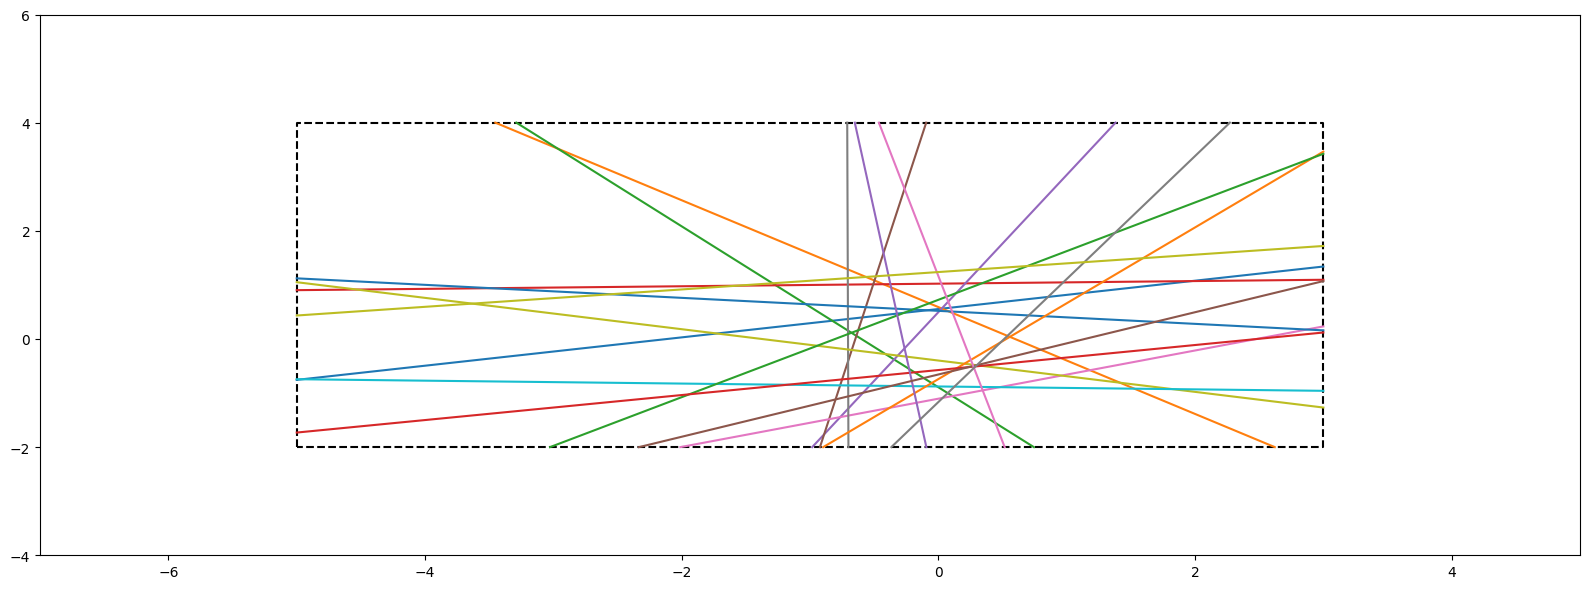

In [1]:
import numpy as np
from numpy.random import randn
from matplotlib import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0, 0, 1, 1]):
    """
    vec: a vector of length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x | bias + vec[0] * x1 + vec[1] * x2 = 0 }
    """
    l_x, l_y, u_x, u_y = box
    intersections = []

    #第一邊: x = l_x
    x = l_x
    y = -(bias + vec[0] * x) / vec[1] if vec[1] != 0 else None
    if y is not None and l_y <= y <= u_y:
        intersections.append((x, y))

    #第二邊: x = u_x
    x = u_x
    y = -(bias + vec[0] * x) / vec[1] if vec[1] != 0 else None
    if y is not None and l_y <= y <= u_y:
        intersections.append((x, y))

    #第三邊: y = l_y
    y = l_y
    x = -(bias + vec[1] * y) / vec[0] if vec[0] != 0 else None
    if x is not None and l_x <= x <= u_x:
        intersections.append((x, y))

    #第四邊: y = u_y
    y = u_y
    x = -(bias + vec[1] * y) / vec[0] if vec[0] != 0 else None
    if x is not None and l_x <= x <= u_x:
        intersections.append((x, y))

    #如果沒有交點，則返回空數組
    if len(intersections) < 1:
        return np.array([]), np.array([])

    #用zip函式提取出X,Y值
    X, Y = zip(*intersections)
    return np.array(X), np.array(Y)

# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx - 2, ux + 2)
ax.set_ylim(ly - 2, uy + 2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')

for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1).item(), box=box)
    if X.size > 0 and Y.size > 0:  #有交點才畫出來
        ax.plot(X, Y)

plt.tight_layout()
plt.savefig("lines_in_box.pdf")